# Treinamento de Modelo para Classificação de Motos Mottu

In [12]:
# Instalar bibliotecas necessárias
!pip install tensorflow

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## Montar o Google Drive e definir o caminho do dataset

In [14]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/challenge_mottu/mototrack_ai/dataset'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Gerar os dados de treino e validação

In [15]:

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training',
    shuffle=True
)



val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

print(train_generator.class_indices)


Found 35 images belonging to 3 classes.
Found 8 images belonging to 3 classes.
{'mottu_e': 0, 'mottu_pop': 1, 'mottu_sport': 2}


## Criar e treinar modelo de rede neural convolucional (CNN)

In [16]:

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.2433 - loss: 16.7371 - val_accuracy: 0.3750 - val_loss: 7.1167
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 942ms/step - accuracy: 0.3245 - loss: 5.5309 - val_accuracy: 0.3750 - val_loss: 1.3968
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 903ms/step - accuracy: 0.4760 - loss: 1.0504 - val_accuracy: 0.3750 - val_loss: 1.1081
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 889ms/step - accuracy: 0.8380 - loss: 0.5289 - val_accuracy: 0.7500 - val_loss: 0.9293
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 739ms/step - accuracy: 0.9238 - loss: 0.2306 - val_accuracy: 0.5000 - val_loss: 1.0790


## Visualizar resultados

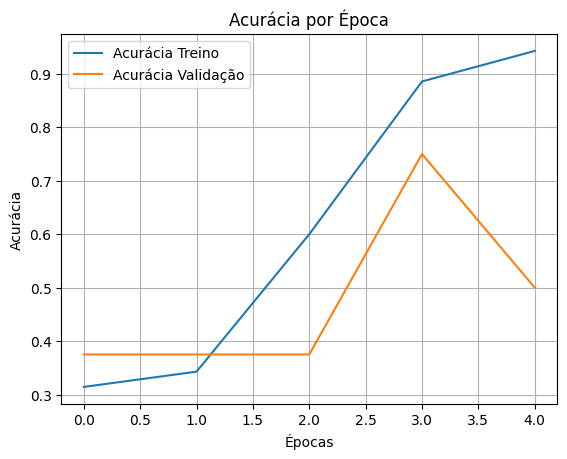

In [17]:

plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia por Época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid()
plt.show()


In [18]:
# Salvar o modelo
model.save('/content/drive/MyDrive/mottu/modelo_mottu.keras')